<style>
/* Adjust the width and size of the notebook */
.container {
    width: 100%; /* Set the width to 100% */
    max-width: 1200px; /* Set a maximum width */
}
/* Adjust the font size of code cells */
.code_cell .input_area {
    font-size: 14px; /* Set font size for code cells */
}
/* Adjust the font size of markdown cells */
.text_cell {
    font-size: 16px; /* Set font size for markdown cells */
}
</style>


<style>
/* Adjust the width and size of the notebook */
.container {
    width: 100%; /* Set the width to 100% */
    max-width: 1200px; /* Set a maximum width */
}
/* Adjust the font size of code cells */
.code_cell .input_area {
    font-size: 14px; /* Set font size for code cells */
}
/* Adjust the font size of markdown cells */
.text_cell {
    font-size: 16px; /* Set font size for markdown cells */
}
</style>


## Data Visualisation Project

In [560]:
# Pandas for data manipulation and analysis
import pandas as pd

# For numerical operations
import numpy as np

# For plotting
import matplotlib.pyplot as plt

# GridSpec for creating complex subplot layouts
from matplotlib.gridspec import GridSpec

# Patches for drawing shapes (e.g., rectangles) in plots
import matplotlib.patches as patches


In [561]:
# Loading Signal and Annotation Data
df_annotation = pd.read_csv("/Users/lola/Downloads/datavis_project_part2_24/10_project_data_annotation.csv")
df_signal = pd.read_csv("/Users/lola/Downloads/datavis_project_part2_24/10_project_data_signals.csv")

In [562]:
#To get an overview of the data content
df_annotation.head()

,name,type,start,stop,strand
0,geneA,transcript,2000,7764,+
1,geneA,exon,2700,5100,+
2,geneA,exon,6000,6800,+
3,geneB,transcript,9000,12720,-
4,geneB,exon,9900,10100,-


In [563]:
#To check for missing values 
df_annotation.isna().sum()

name      0
type      0
start     0
stop      0
strand    0
dtype: int64

In [564]:
#To get an overview of the data
df_signal.head()

,P1,P2,P3,P4
0,0.28,0.14,0.19,0.19
1,0.30,0.16,0.17,0.20
2,0.26,0.13,0.20,0.12
3,0.21,0.13,0.25,0.15
4,0.31,0.03,0.24,0.20


In [565]:
#To check for missing values
df_signal.isnull().sum()

P1    0
P2    0
P3    0
P4    0
dtype: int64

<font color="red"><h1>TASK 1 </h1></font>

<font color="black"><h2>1.1 Version A</h2></font>


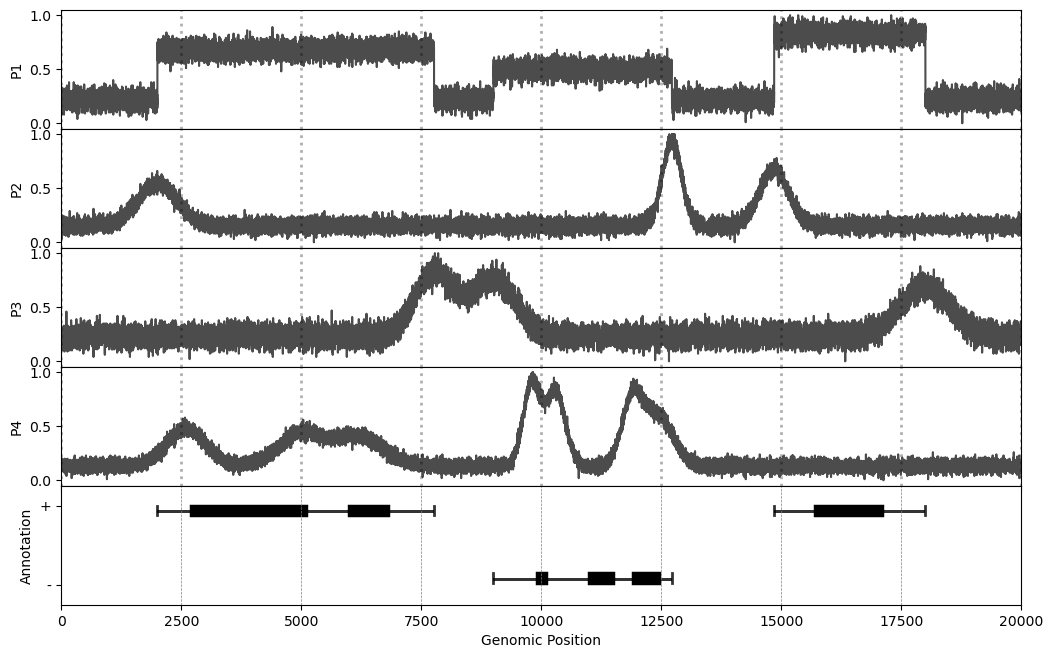

In [566]:
fig = plt.figure(figsize=(12, 7))
gs = GridSpec(5, 1, height_ratios=[1.4, 1.4, 1.4, 1.4, 1.4], hspace=0) #hspace is used to adjust for spacing between individual plot height wise


#Gridspec position definition for all the plots
ax_signals_p1 = fig.add_subplot(gs[0, 0], sharex=ax_annotations) # Position at row 0, all columns of row 0
ax_signals_p2 = fig.add_subplot(gs[1, 0], sharex=ax_annotations) # Position at row 1, all columns of row 1
ax_signals_p3 = fig.add_subplot(gs[2, 0], sharex=ax_annotations) # Position at row 2, all columns of row 2
ax_signals_p4 = fig.add_subplot(gs[3, 0], sharex=ax_annotations) # Position at row 3, all columns of row 3
ax_annotations = fig.add_subplot(gs[4, 0]) #Position at row 4, all columns of row 4

ax_signals_p1.plot(df_signal.index, df_signal["P1"], color='black', alpha=0.7) #df_signal index is used as the x-axis values.
ax_signals_p1.set_ylabel('P1')
ax_signals_p1.set_yticks([0, 0.5, 1])
ax_signals_p1.set_xticklabels([])
ax_signals_p1.grid(True, axis='x', linestyle=':', linewidth=2)

ax_signals_p2.plot(df_signal.index, df_signal["P2"], color='black', alpha=0.7) 
ax_signals_p2.set_ylabel('P2')
ax_signals_p2.set_yticks([0, 0.5, 1])
ax_signals_p2.set_xticklabels([])
ax_signals_p2.grid(True, axis='x', linestyle=':', linewidth=2)

ax_signals_p3.plot(df_signal.index, df_signal["P3"], color='black', alpha=0.7)
ax_signals_p3.set_ylabel('P3')
ax_signals_p3.set_yticks([0, 0.5, 1])
ax_signals_p3.set_xticklabels([])
ax_signals_p3.grid(True, axis='x', linestyle=':', linewidth=2)

ax_signals_p4.plot(df_signal.index, df_signal["P4"], color='black', alpha=0.7)
ax_signals_p4.set_ylabel('P4')
ax_signals_p4.set_yticks([0, 0.5, 1])
ax_signals_p4.set_xticklabels([])
ax_signals_p4.grid(True, axis='x', linestyle=':', linewidth=2)

for index, row in df_annotation.iterrows():
    y_position = 0.85 if row['strand'] == '+' else -0.85  # This positions annotations top/bottom based on strand
    
    if row["type"] == "exon":
        # Rectangle with linewidth = 2.5, represent exons while horizontal lines with width=1 represent transcript
        rect = patches.Rectangle((row["start"], y_position - 0.1), row["stop"]-row["start"], 0.25, linewidth=2.5, edgecolor='black', facecolor='black')
    else:
        rect = patches.Rectangle((row["start"], y_position - 0.04), row["stop"]-row["start"], 0.07, linewidth=1, facecolor='black', alpha=0.8)
    
    ax_annotations.add_patch(rect)
    
    # Short vertical lines for the start and end positions
    ax_annotations.plot([row["start"], row["start"]], [y_position - 0.1, y_position + 0.15], color='black', alpha=0.8,linewidth=2, zorder=2)
    ax_annotations.plot([row["stop"], row["stop"]], [y_position - 0.1, y_position + 0.15], color='black',alpha=0.8, linewidth=2, zorder=2)

# Axis, label, gridlines specification
ax_annotations.set_xlabel('Genomic Position')
ax_annotations.set_ylim(-1.5, 1.5)
ax_annotations.set_yticks([-1, 1])
ax_annotations.set_yticklabels(['-', '+'])
ax_annotations.set_ylabel('Annotation')
ax_annotations.set_xlim([0, 20000])
ax_annotations.grid(True, which='both', axis='x', color='gray', linestyle='--', linewidth=0.5)

plt.subplots_adjust(left=0.1, right=0.9, top=1.20, bottom=0.35)

# Show plot
plt.show()

### 1.2 Version B

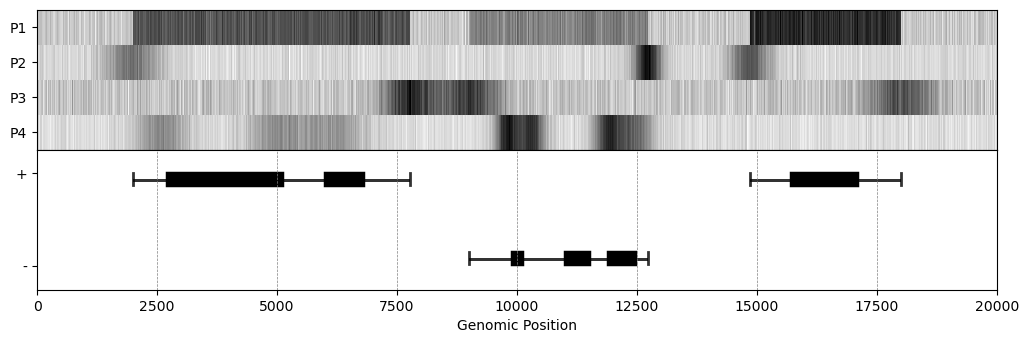

In [567]:
#Figure and GridSpec creation
fig = plt.figure(figsize=(12, 3.5))
gs = GridSpec(2, 1, height_ratios=[1.75, 1.75], hspace=0) #height ratios means they both occupy equal amount of rows based on the specified height for figsize.

#Gridspec position definition for all the plots
ax_heatmap = fig.add_subplot(gs[0, 0]) # Position at row 0, all columns of row 0
ax_annotations = fig.add_subplot(gs[1, 0]) # Position at row 1, all columns of row 1   


#HEATMAP PLOT
ax_heatmap.imshow(df_signal.T, aspect='auto', cmap='binary', interpolation="none") # Interpolation is set to "none" to ensure each cell line is visible and not smooth out while binary is the color palette
ax_heatmap.set_yticks(range(len(df_signal.columns)))
ax_heatmap.set_yticklabels(df_signal.columns)
ax_heatmap.set_xticklabels([]) #removes x-axis label for this plot, so that it doesnt show below the 2nd plot
ax_heatmap.set_xticks([]) #removes x-axis ticks
ax_heatmap.set_xlim([0, 20000])
ax_heatmap.grid(True, which='both', axis='x', color='white', linestyle=':', linewidth=1.5)


#ANNOTATION PLOT
for index, row in df_annotation.iterrows():
    y_position = 0.85 if row['strand'] == '+' else -0.85  # This positions annotations top/bottom based on strand
    
    if row["type"] == "exon":
        # Rectangle with linewidth = 2.5, represent exons while horizontal lines with width=1 represent transcript
        rect = patches.Rectangle((row["start"], y_position - 0.1), row["stop"]-row["start"], 0.25, linewidth=2.5, edgecolor='black', facecolor='black')
    else:
        rect = patches.Rectangle((row["start"], y_position - 0.04), row["stop"]-row["start"], 0.07, linewidth=1, facecolor='black', alpha=0.8)
    
    ax_annotations.add_patch(rect)
    
    # Add vertical lines at the start and end positions
    ax_annotations.plot([row["start"], row["start"]], [y_position - 0.1, y_position + 0.15], color='black', alpha=0.8,linewidth=2, zorder=2)
    ax_annotations.plot([row["stop"], row["stop"]], [y_position - 0.1, y_position + 0.15], color='black',alpha=0.8, linewidth=2, zorder=2)

# Annotation Axis, labels and gridlines specification
ax_annotations.set_ylim(-1.5, 1.5)
ax_annotations.set_yticks([-1, 1])
ax_annotations.set_yticklabels(['-', '+'])
ax_annotations.set_xlabel('Genomic Position')
ax_annotations.set_xlim([0, 20000])
ax_annotations.grid(True, which='both', axis='x', color='gray', linestyle='--', linewidth=0.5)
# Adjust layout
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.15)

# Show plot
plt.show()

### 1.3 Version C

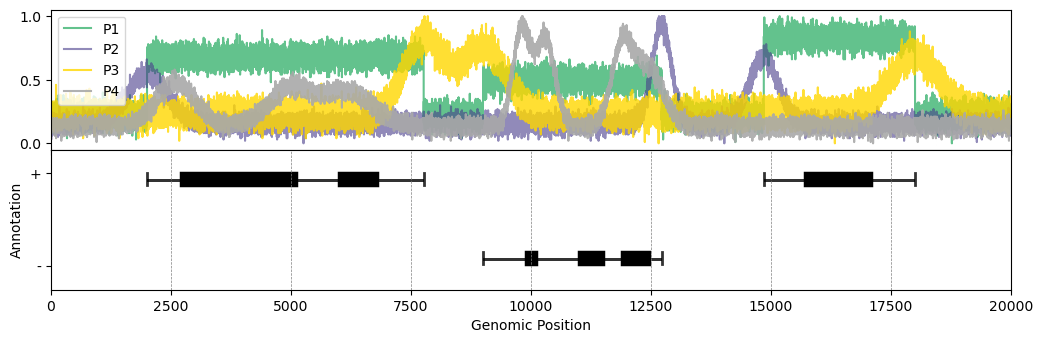

In [568]:
#Figure and GridSpec creation
fig = plt.figure(figsize=(12, 3.5))
gs = GridSpec(2, 1, height_ratios=[1.75, 1.75], hspace=0)

# Subplot assignment for each plot
ax_signals = fig.add_subplot(gs[0, 0])
ax_annotations = fig.add_subplot(gs[1, 0])

#Signal Data Plot. df_signal.index is used as the x-axis values.
ax_signals.plot(df_signal.index, df_signal["P1"], label='P1', color='mediumseagreen', alpha=0.8) 
ax_signals.plot(df_signal.index, df_signal["P2"], label='P2', color='darkslateblue', alpha=0.6)
ax_signals.plot(df_signal.index, df_signal["P3"], label='P3', color='gold', alpha=0.8)
ax_signals.plot(df_signal.index, df_signal["P4"], label='P4', color='darkgray', alpha=0.9)
#Axis Labelling for signal plot 
ax_signals.legend(loc='upper left')
ax_signals.set_xticklabels([]) #removes x-axis label for this plot, so that it doesnt show below the 2nd plot
ax_signals.set_xlim([0, 20000])
ax_signals.set_yticks([0, 0.5, 1])
ax_signals.grid(True, which='both', axis='x', color='white', linestyle=':', linewidth=1.5)


# Annotation Plot
for index, row in df_annotation.iterrows():
    y_position = 0.85 if row['strand'] == '+' else -0.85  # This positions annotations top/bottom based on strand
    
    if row["type"] == "exon":
        # Rectangle with linewidth = 2.5, represent exons while horizontal lines with width=1 represent transcript
        rect = patches.Rectangle((row["start"], y_position - 0.1), row["stop"]-row["start"], 0.25, linewidth=2.5, edgecolor='black', facecolor='black')
    else:
        rect = patches.Rectangle((row["start"], y_position - 0.04), row["stop"]-row["start"], 0.07, linewidth=1, facecolor='black', alpha=0.8)
    
    ax_annotations.add_patch(rect)
    
    # Add vertical lines at the start and end positions
    ax_annotations.plot([row["start"], row["start"]], [y_position - 0.1, y_position + 0.15], color='black', alpha=0.8,linewidth=2, zorder=2)
    ax_annotations.plot([row["stop"], row["stop"]], [y_position - 0.1, y_position + 0.15], color='black',alpha=0.8, linewidth=2, zorder=2)

# x and y-axis label for the annotation plot
ax_annotations.set_ylim(-1.5, 1.5)
ax_annotations.set_yticks([-1, 1])
ax_annotations.set_yticklabels(['-', '+'])
ax_annotations.set_xlabel('Genomic Position')
ax_annotations.set_ylabel('Annotation')
ax_annotations.set_xlim([0, 20000])
ax_annotations.grid(True, which='both', axis='x', color='gray', linestyle='--', linewidth=0.5)

# To adjust the layout for the subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.15)

# Show plot
plt.show()

### Comparing all Visualization Versions

From personal observation of the three plots, the comparison primarily revolves around using either a line plot or a heatmap to represent the signal data, while the annotation data plot helps to visualize the genomic features such as transcripts and exons on the '+' and '-' strands remains consistent. The rectangles represent exons, and the lines connecting them represent the transcripts. It provides context to the signal data, showing how the binding patterns align with the structure of transcripts and exons.

**Version A: Individual Line Plots for Signal Data**

Advantages:
* The individual line plots for the signal data help to easily spot RNA-binding protein (RBP) signal intensities across genomic positions, providing a detailed analysis of high and low trends in signal data.
For instance;
P1: Shows a step-like pattern with regions of high and low signal intensity.
P2: Has a peak around the middle of its genomic positions, indicating a high concentration of RBP binding.
P3: Displays two distinct peaks and some variation throughout, suggesting multiple binding sites.
P4: Shows periodic peaks, indicating regular intervals of high RBP binding.

Disadvantages:
* The lines tend to overlap and obscure each other with the large amount of data, making it difficult to distinguish between signals.
* The plot can also seem to be visually cluttered with many data points.

**Version B: Heatmaps for Signal Data**

Advantages:
* The heatmaps make it easier to visualize regions of high and low binding intensity in a more compact form. 
* The color gradients provide a quick overview of the RBP binding distribution across the genomic positions. Darker areas indicates high expression while lighter areas indicates low expression

Disadvantages:
* It is harder to see exact values and subtle changes due to loss of detailed variations in the data.
* Trends over time or position are harder to discern compared to line plots.

The bottom panel is the same annotation plot as in Version A, providing context to the signal data with the structure of transcripts and exons. 

**Version C: Combined Line Plot for Signal Data**

The combined line plot, as opposed to individual line plots in Version A, combines plots of signals P1, P2, P3, and P4 with different colors for each. 

Advantages:
* Enables comprehensive comparison of multiple signals and their relationship with the annotation plot.
* The different colors used help to distinguish between the signals, allowing for easy comparison of the RBP binding patterns.

Disadvantages:
* Combining different types of plots makes the visualization a bit cluttered and harder to interpret, especially with many signals.
* Additionally, readers with color blindness might have problem distinguishing between colors, making interpretation of the plot difficult.


<font color="red"><h1>TASK 2 </h1></font>

In [569]:
#loading the datasets
df_scatterplot = pd.read_csv("/Users/lola/Downloads/datavis_project_part2_24/10_project_data_scatter.csv")

In [570]:
df_barplot1 = pd.read_csv("/Users/lola/Downloads/datavis_project_part2_24/10_project_data_barplot.csv")

In [571]:
#Renaming the Unnamed column and addition of arrow (->) to the dataset for easy labelling
df_barplot = df_barplot1.rename(columns={"Unnamed: 0": "Event"})
df_barplot['Event'] = df_barplot['Event'].apply(lambda x: '→'.join(x))

In [572]:
#To get an overview of the data
df_barplot.head()

,Event,condition_a_sample_1,condition_a_sample_2,control
0,X→Y,756,619,689
1,X→Z,2411,2189,782
2,Y→X,577,821,689
3,Y→Z,743,781,719


In [573]:
#An overview of the scatter plot data
df_scatterplot.head()

,x1,x2
0,8.41,5.43
1,9.56,3.92
2,10.83,1.80
3,11.14,2.32
4,11.41,1.41


In [574]:
#Checking for null values
df_scatterplot.isnull().sum()

x1    0
x2    0
dtype: int64

### Multiple Panel Plot


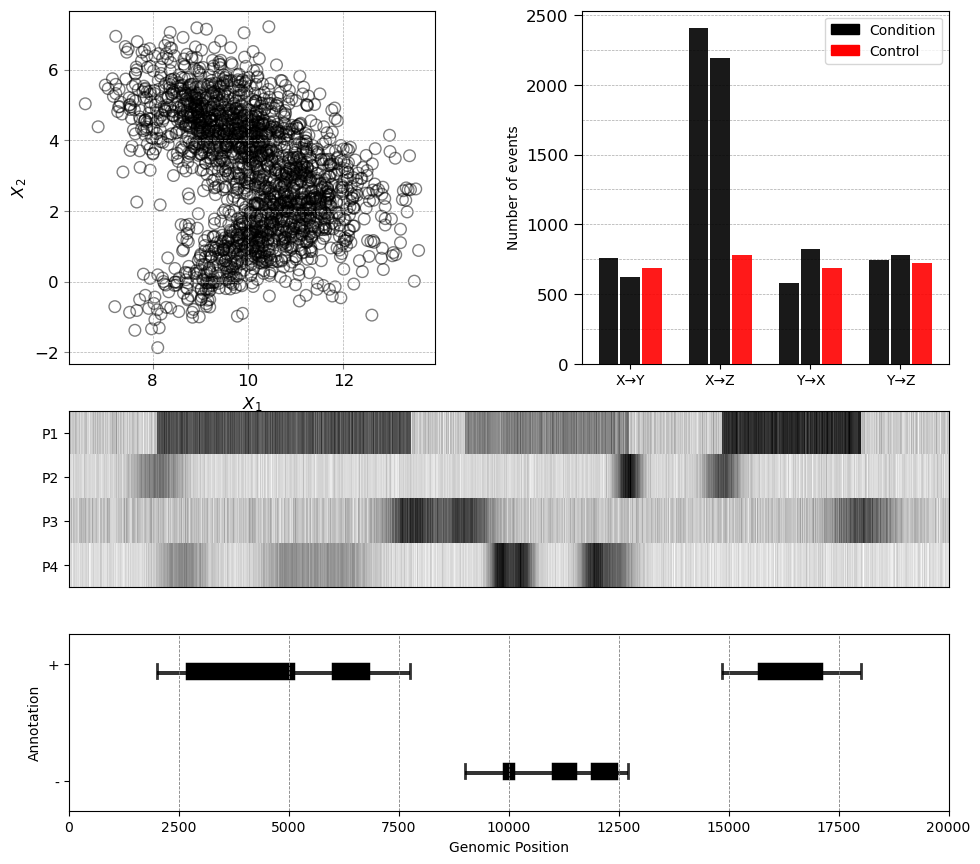

In [582]:
# Creating the plot layout
fig = plt.figure(figsize=(11, 10)) #Increases the width/length size of the whole subplot so that they space out better
gs = GridSpec(3, 2, height_ratios=[4, 2, 2], hspace=0.20, wspace=0.4) # height_ratio defined for the space taken up by each plot

#Gridspec position definition for all the plots
ax_scatter = fig.add_subplot(gs[0, 0])# Position at row 0, column 0
ax_bar = fig.add_subplot(gs[0, 1]) # Position at row 0, column 1
ax_heatmap = fig.add_subplot(gs[1, :]) # Position at row 1, all column for the row 1
ax_annotations = fig.add_subplot(gs[2, :]) # Position at row 2, all column for the row 2

# SCATTER PLOT
ax_scatter.scatter(df_scatterplot["x1"], df_scatterplot["x2"], facecolors='none', edgecolors='black', alpha=0.5, s=70)
ax_scatter.set_xticks([8, 10, 12])
ax_scatter.grid(axis='x', linestyle='--', linewidth=0.5)
ax_scatter.grid(True, axis='y', which="both", linestyle='--', linewidth=0.5)
ax_scatter.tick_params(axis='both', which='major', labelsize=12, color='grey')

#formatted to display "1" and "2" as subscripts.
ax_scatter.set_xlabel(r'$X_1$', fontsize=12)
ax_scatter.set_ylabel(r'$X_2$', fontsize=12)


# BAR PLOT 
# Sets the width of each bar in the bar plot
bar_width = 0.24

# To generate an array of indices for the x positions of the bars
index = np.arange(len(df_barplot))

# Plot the bars for each condition with specified width, label, color and z-order
condition_a_bar = ax_bar.bar(index - bar_width, df_barplot['condition_a_sample_1'], bar_width/1.1, label='Condition A Sample 1', color='black', alpha=0.9, zorder=3)
codition_b_bar = ax_bar.bar(index, df_barplot['condition_a_sample_2'], bar_width/1.1, label='Condition A Sample 2', color='black', alpha=0.9, zorder=3)
control_bar = ax_bar.bar(index + bar_width, df_barplot['control'], bar_width/1.1, label='Control', color='red', alpha=0.9, zorder=3)

# Bar Plot Axis, Grid and Label definition
ax_bar.set_ylabel('Number of events')
ax_bar.set_xticks(index)
ax_bar.set_xticklabels(df_barplot['Event'])
ax_bar.set_yticks(minor_ticks, minor=True) #Enables minor ticks lines inside plot
ax_bar.tick_params(axis='y', which='major', labelsize=12, color='black', length=6)
ax_bar.tick_params(axis='y', which='minor', labelsize=12, color='black', length=0) #To remove minor y-tick outside the plot

# Manual y-ticks setting for both major and minor ticks
major_ticks = [0, 500, 1000, 1500, 2000, 2500]
minor_ticks = [250, 750, 1250, 1750, 2250]
# To enabling gridlines for both major and minor ticks
ax_bar.grid(True, axis='y', which="major", linestyle='--', linewidth=0.5, color="darkgrey")
ax_bar.grid(True, axis='y', which="minor", linestyle='--', linewidth=0.5, color="darkgrey")

# Matplotlib patches used to create personalised legend
condition_patch = patches.Rectangle((0,0),1,1, color='black', label='Condition')
control_patch = patches.Rectangle((0,0),1,1, color='red', label='Control')
# Adding the legend with the custom patches
ax_bar.legend(handles=[condition_patch, control_patch])


# HEATMAP PLOT
ax_heatmap.imshow(df_signal.T, aspect='auto', cmap='binary', interpolation="none") # Interpolation is set to "none" to ensure each cell line is visible and not smooth out
ax_heatmap.set_yticks(range(len(df_signal.columns)))
ax_heatmap.set_yticklabels(df_signal.columns)
ax_heatmap.set_xticklabels([]) #removes x-axis label
ax_heatmap.set_xticks([]) #removes x-axis ticks


# ANNOTATION PLOT
for index, row in df_annotation.iterrows():
    y_position = 0.85 if row['strand'] == '+' else -0.85  # This positions annotations top/bottom based on strand
    
    if row["type"] == "exon":
        # Rectangle with linewidth = 2.5, represent exons while horizontal lines with width=1 represent transcript
        rect = patches.Rectangle((row["start"], y_position - 0.1), row["stop"]-row["start"], 0.25, linewidth=2.5, edgecolor='black', facecolor='black')
    else:
        rect = patches.Rectangle((row["start"], y_position - 0.04), row["stop"]-row["start"], 0.07, linewidth=1, facecolor='black', alpha=0.8)
    
    ax_annotations.add_patch(rect)
    
    # Add vertical lines at the start and end positions
    ax_annotations.plot([row["start"], row["start"]], [y_position - 0.1, y_position + 0.15], color='black', alpha=0.8,linewidth=2, zorder=2)
    ax_annotations.plot([row["stop"], row["stop"]], [y_position - 0.1, y_position + 0.15], color='black',alpha=0.8, linewidth=2, zorder=2)

# Axis label for the annotation plot
ax_annotations.set_ylim(-1.5, 1.5)
ax_annotations.set_yticks([-1, 1])
ax_annotations.set_yticklabels(['-', '+'])
ax_annotations.set_xlabel('Genomic Position')
ax_annotations.set_ylabel('Annotation')
ax_annotations.set_xlim([0, 20000])
ax_annotations.grid(True, which='both', axis='x', color='gray', linestyle='--', linewidth=0.6)

# Layout adjustment to space out subplot better
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.15)

# Show plot
plt.show()

<font color="red"><h1>TASK 3 </h1></font>


#### LINE PLOTS USING GRIDSPEC

In [576]:
#Loading the lineplot dataset
df_lineplot = pd.read_csv("/Users/lola/Downloads/datavis_project_part2_24/10_project_data_lineplots.csv")
df_lineplot.head()

,years,A,B,C,D,E,F
0,1970,13.0,19.0,20.5,3.0,4.8,5.1
1,1975,14.0,15.0,17.0,4.0,5.0,4.8
2,1980,17.0,11.0,12.0,6.0,4.7,5.5
3,1985,22.0,9.0,8.0,5.5,4.4,6.0
4,1990,21.0,12.5,10.0,5.1,5.2,7.3


In [577]:
#checking for possible missing values in the dataframe
df_lineplot.isnull().sum()

years    0
A        0
B        0
C        0
D        0
E        0
F        0
dtype: int64

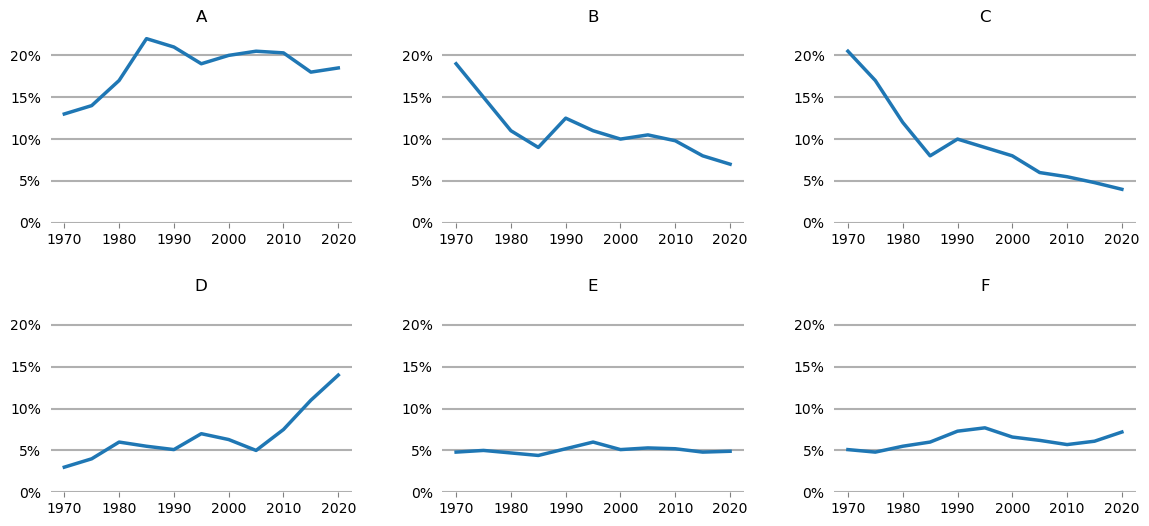

In [578]:
# Figure and GridSpec creation with increased aspect ratio
fig = plt.figure(figsize=(14, 6))  
gs = GridSpec(2, 3, hspace=0.4, wspace=0.3) 

# Define the subplots
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])


# Plot Setup
for ax, label in zip([ax1, ax2, ax3, ax4, ax5, ax6], ['A', 'B', 'C', 'D', 'E', 'F']):  #To assign label to each subplot
    ax.plot(df_lineplot["years"], df_lineplot[label], linewidth=2.5) # The linewidth for the plotline itself is set to 2.5 to make it thicker  
    ax.set_title(label)
    ax.set_ylim(0, 23) #y-lim is set to 23 to ensure all ranges outside of 23 are covered
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%')) #lambda; to output the y axis value as a percentage
    ax.grid(True, which='both', axis='y', linestyle='-', linewidth=1.5)
    ax.tick_params(axis='y', which='both', left=False, right=False) #Removes the y-axis ticks to match the specified sample
    ax.tick_params(axis='both', which='major', labelsize=10, color='grey')
    
    #spines definition to remove border lines not needed for the plot 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


<font color="red"><h1>TASK 4 </h1></font>


### K-MER PLOT

In [579]:
# DNA sequences read from the downloaded file
file_path = '/Users/lola/Downloads/datavis_project_part2_24/10_project_data_dna_sequences.txt'
with open(file_path, 'r') as file:
    dna_seq = [line.strip() for line in file]

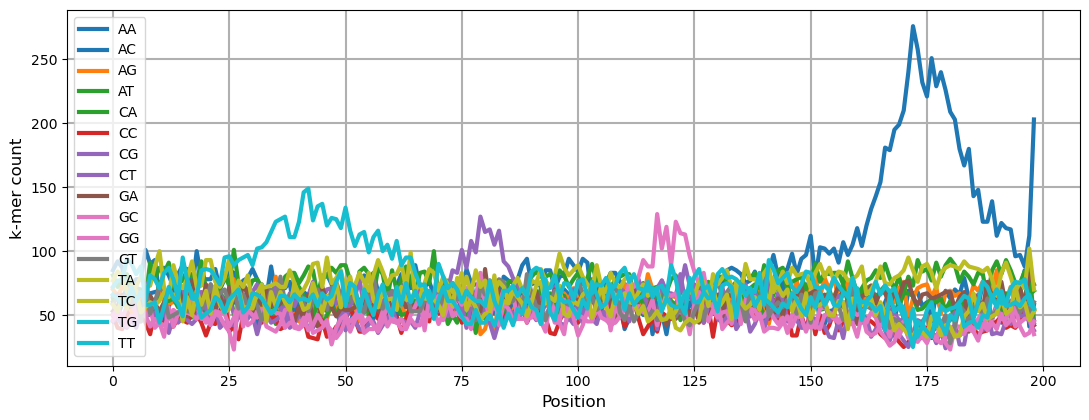

In [580]:
plt.figure(figsize=(11, 4.3))

# k-mer length
k = 2

# This help to calculate and store the length of a DNA sequence and the number of sequences
seq_length = len(dna_seq[0])
num_seq = len(dna_seq)

# Dictionary to hold the counts for each k-mer
kmer_list = ['AA', 'AC', 'AG', 'AT', 'CA', 'CC', 'CG', 'CT', 
             'GA', 'GC', 'GG', 'GT', 'TA', 'TC', 'TG', 'TT']
kmer_counts = {kmer: np.zeros(seq_length - k + 1) for kmer in kmer_list}

# To count the occurrences of each k-mer at each position
for seq in dna_seq:
    for i in range(len(seq) - k + 1):
        kmer = seq[i:i+k]
        if kmer in kmer_counts:
            kmer_counts[kmer][i] += 1

# Counts converted to a DataFrame for easier plotting
kmer_df = pd.DataFrame(kmer_counts)

#Colormap definition with number of distinct colors equal to the number of k-mers
cmap = plt.get_cmap('tab10',len(kmer_df.columns))

# Plots the count of each k-mer at each position
for i, kmer in enumerate(kmer_df.columns):
    plt.plot(kmer_df.index, kmer_df[kmer], label=kmer, linewidth=3, color=cmap(i))


plt.xlabel('Position', fontsize=12)
plt.ylabel('k-mer count', fontsize=12)
plt.grid(True, linewidth=1.5)
plt.legend(bbox_to_anchor=(-0.0, 0.85, 0.7,0.15), loc='upper left') #To adjust for position of legend box in plot
plt.tight_layout()
plt.show()


### REFERENCES
1. Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. doi:10.1109/MCSE.2007.55 Retrieved from https://matplotlib.org/stable/users/index.html
